<h1>Higgins Bosson Event Detection</h1>
<hr>
<h2>Project 5</h2>
<hr>
<h3>Modelling</h3>

In [15]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, make_scorer, precision_score,
                            classification_report, confusion_matrix,
                            f1_score, recall_score)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.wrappers.scikit_learn import KerasClassifier
#this wrapper iso ne oftThe original TensorFlow (TF) wrappers and are not actively maintained,
# and will be removed in a future release.
from scikeras.wrappers import KerasClassifier, KerasRegressor
from math import floor
from math import trunc
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

import tensorflow as tf

import joblib

%matplotlib inline

<hr>
Read de dataset
<hr>

In [2]:
df_bosson = pd.read_csv('../datasets/training_post_preprocessing.csv')

lets start remembering the dataset structure

In [3]:
df_bosson.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,246550.0,225017.309876,72168.777490,100000.000000,162521.250000,225023.500000,287519.750000,349999.000000
der_mass_mmc,246550.0,123.107459,52.031996,43.255000,96.676000,120.670000,131.011000,1192.026000
der_mass_transverse_met_lep,246550.0,49.090444,35.484510,0.000000,18.982250,46.063000,73.633500,690.075000
der_mass_vis,246550.0,81.946753,40.586595,10.325000,60.025250,74.141000,92.613000,1349.351000
der_pt_h,246550.0,57.995010,63.999362,0.000000,13.400000,38.326500,79.534000,2834.999000
der_deltar_tau_lep,246550.0,2.394289,0.766715,0.322000,1.844000,2.506000,2.967000,5.684000
der_pt_tot,246550.0,18.879707,22.297805,0.000000,2.825000,12.139000,27.555000,2834.999000
der_sum_pt,246550.0,158.843052,116.091309,46.104000,77.568500,120.847000,201.195000,1852.462000
der_pt_ratio_lep_tau,246550.0,1.435654,0.846865,0.047000,0.879000,1.277000,1.775750,19.773000
der_met_phi_centrality,246550.0,-0.122775,1.198830,-1.414000,-1.372000,-0.345000,1.232000,1.414000


In [4]:
#prepare the dataset, split into X and y datasets and then split them again into trains and test
X = df_bosson.drop(['label'], axis=1)
y = df_bosson['label']

In [5]:
# Originally I had not used this step,  normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
#lets split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=11, stratify = y)

In [7]:
print ('Split Datasets')
print ('==============')
print(f'1. X_train :{X_train.shape}')
print(f'2. y_train :{y_train.shape}')
print(f'1. X_test :{X_test.shape}')
print(f'2. y_test :{y_test.shape}')

Split Datasets
1. X_train :(172585, 25)
2. y_train :(172585,)
1. X_test :(73965, 25)
2. y_test :(73965,)


<hr>
modelling the Neural Network
<hr>

In [8]:
# Neural network
nn_model = Sequential()
nn_model.add(Dense(50, input_dim=25, activation='relu'))
nn_model.add(Dense(25, activation='relu'))
nn_model.add(Dense(12, activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))

In [9]:
#binary_crossentropy, because the target feature is binary
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
##Time to train!!
history = nn_model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=50, batch_size=64)

Epoch 1/50
2697/2697 [==============================] - 5s 2ms/step - loss: 0.1327 - accuracy: 0.9467 - val_loss: 0.0950 - val_accuracy: 0.9638
Epoch 2/50
2697/2697 [==============================] - 4s 1ms/step - loss: 0.0856 - accuracy: 0.9671 - val_loss: 0.0756 - val_accuracy: 0.9702
Epoch 3/50
2697/2697 [==============================] - 4s 1ms/step - loss: 0.0733 - accuracy: 0.9718 - val_loss: 0.0673 - val_accuracy: 0.9744
Epoch 4/50
2697/2697 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9754 - val_loss: 0.0551 - val_accuracy: 0.9795
Epoch 5/50
2697/2697 [==============================] - 4s 1ms/step - loss: 0.0540 - accuracy: 0.9792 - val_loss: 0.0464 - val_accuracy: 0.9835
Epoch 6/50
2697/2697 [==============================] - 4s 2ms/step - loss: 0.0429 - accuracy: 0.9838 - val_loss: 0.0373 - val_accuracy: 0.9868
Epoch 7/50
2697/2697 [==============================] - 4s 1ms/step - loss: 0.0325 - accuracy: 0.9885 - val_loss: 0.0409 - val_accuracy:

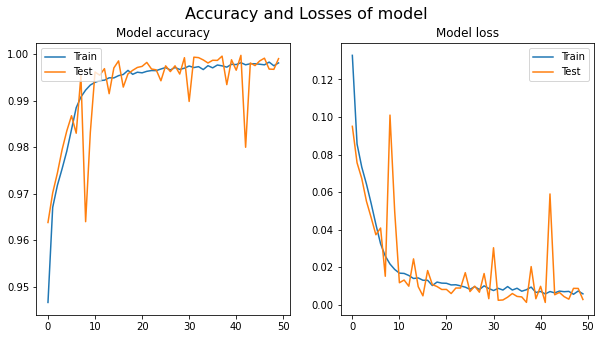

In [11]:
#plot
#ploting accuracy
figure, (axis1,axis2) = plt.subplots(1, 2,figsize=(10, 5))
figure.suptitle("Accuracy and Losses of model", fontsize=16)
axis1.plot(history.history['accuracy'])
axis1.plot(history.history['val_accuracy'])
axis1.title.set_text('Model accuracy')
axis1.title.set_y('Accuracy')
#axis1.title.set_x('Epoch')
axis1.legend(['Train', 'Test'], loc='upper left')

#ploting losses
axis2.plot(history.history['loss'])
axis2.plot(history.history['val_loss'])
axis2.title.set_text('Model loss')
axis2.title.set_y('Loss')
#axis2.title.set_x('Epoch')
axis2.legend(['Train', 'Test'], loc='upper right')

#show the graph

plt.show()

In [12]:
#predicting
y_pred = nn_model.predict(X_test)

2312/2312 [==============================] - 2s 750us/step


In [13]:
#evaluate the model
_, train_acc = nn_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = nn_model.evaluate(X_test, y_test, verbose=0)

In [14]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.999


In [16]:
y_pred_arg = np.argmax(y_pred, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred_arg , average="macro"))
print(recall_score(y_test, y_pred_arg , average="macro"))
print(f1_score(y_test, y_pred_arg , average="macro"))

0.326384100588116
0.5
0.39495447741048856


C:\Users\hmorales\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<hr>
Tunning model
<hr>